In [ ]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
area='河南'
data=pd.read_excel('area_compute.xlsx',area) 
data

In [122]:
year=data['year']
y=data['65岁以上老人口数(人)']
del data['year']
x=data
y_train=y.iloc[1:]
y_train=np.reshape(y_train.values, (-1,1))  
x_train=x.iloc[:-1,:]
x_test=x.iloc[-1,:]
x_train_columns=x_train.columns

In [123]:
#以下函数均为对模型进行检验所用到的 精简代码的作用
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
def up_down_accuracy(y_true, y_pred):
    y_var_test=y_true[1:]-y_true[:len(y_true)-1]#实际涨跌
    y_var_predict=y_pred[1:]-y_pred[:len(y_pred)-1]#原始涨跌
    txt=np.zeros(len(y_var_test))
    for i in range(len(y_var_test-1)):#计算数量
        txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
    result=sum(txt)/len(txt)
    return result
def output(model,X_train,y_train):
    #在训练集上的拟合结果
    y_train_predict=model.predict(X_train)
    y_train_predict=np.reshape(y_train_predict, (-1,1))  
    # 反归一化
    #y_train_predict= mm_y.inverse_transform(y_train_predict)
    #y_train=mm_y.inverse_transform(y_train)
    #展示在训练集上的表现 
    draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
    draw.iloc[:,0].plot(figsize=(12,6))
    draw.iloc[:,1].plot(figsize=(12,6))
    plt.legend(('real', 'predict'),fontsize='15')
    plt.title("Train Data",fontsize='30') #添加标题
    plt.show()
    #输出结果
    print('训练集上的MAE/MSE/MAPE/涨跌准确率')
    print(mean_absolute_error(y_train_predict, y_train))
    print(mean_squared_error(y_train_predict, y_train) )
    print(mape(y_train_predict, y_train) )
    print(up_down_accuracy(y_train_predict,y_train))
    x_test=x.iloc[-1,:]
    #进行实际预测
    x_test=np.reshape(x_test.values, (1,-1))  
    y_test_predict=model.predict(x_test)
    #y_test_predict=np.reshape(y_test_predict, (-1,1))  
    #y_test_predict= mm_y.inverse_transform(y_test_predict)
    print('最终预测为：',y_test_predict)

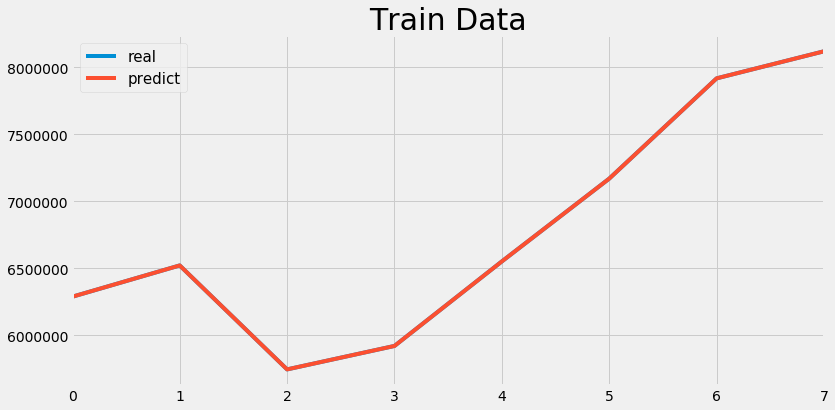

训练集上的MAE/MSE/MAPE/涨跌准确率
0.0002243518829345703
6.550544640049338e-08
3.3184723016764857e-09
1.0
最终预测为： [[-33812177.42844152]]


In [124]:
# 建立线性回归模型 预测
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model = lr.fit(x_train, y_train) 
output(model,x_train, y_train)

In [125]:
record=[]
record.append(model.coef_[0,:])

E:\anoconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246256304939.0622, tolerance: 541760517.8786
  positive)


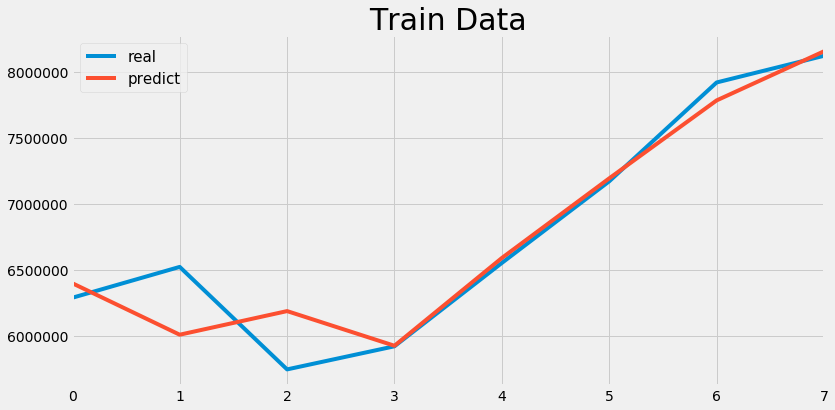

训练集上的MAE/MSE/MAPE/涨跌准确率
162389.1278965883
61563995620.05206
2.5649465286765287
0.5714285714285714
最终预测为： [8868562.37852535]


In [126]:
#弹性网回归及其结果
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet(alpha=.01, l1_ratio=1, random_state=3)
model = elasticnet.fit(x_train, y_train)
output(model,x_train, y_train)

In [127]:
record.append(model.coef_)
string='coef of linear regression.xlsx'
string=area+string
pd.DataFrame(record).to_excel(string)

In [128]:
#以下函数均为对模型进行检验所用到的 精简代码的作用
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
def up_down_accuracy(y_true, y_pred):
    y_var_test=y_true[1:]-y_true[:len(y_true)-1]#实际涨跌
    y_var_predict=y_pred[1:]-y_pred[:len(y_pred)-1]#原始涨跌
    txt=np.zeros(len(y_var_test))
    for i in range(len(y_var_test-1)):#计算数量
        txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
    result=sum(txt)/len(txt)
    return result
def output(model,X_train,y_train):
    record=[]
    #在训练集上的拟合结果
    y_train_predict=model.predict(X_train)
    record.append(np.reshape(y_train_predict, (-1))  )
    record.append(np.reshape(y_train, (-1)) )
    y_train_predict=np.reshape(y_train_predict, (-1,1))  
    #展示在训练集上的表现 
    draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
    draw.iloc[:,0].plot(figsize=(12,6))
    draw.iloc[:,1].plot(figsize=(12,6))
    plt.legend(('real', 'predict'),fontsize='15')
    plt.title("Train Data",fontsize='30') #添加标题
    plt.show()
    #输出结果
    print('训练集上的MAE/MSE/MAPE/涨跌准确率')
    print(mean_absolute_error(y_train_predict, y_train))
    record.append(np.array([mean_absolute_error(y_train_predict, y_train)]))
    print(mean_squared_error(y_train_predict, y_train) )
    record.append(np.array([mean_squared_error(y_train_predict, y_train)]))
    print(mape(y_train_predict, y_train) )
    record.append(np.array([mape(y_train_predict, y_train)]))
    print(up_down_accuracy(y_train_predict,y_train))
    record.append(np.array([up_down_accuracy(y_train_predict, y_train)]))
    x_test=x.iloc[-1,:]
    #进行实际预测
    x_test=np.reshape(x_test.values, (1,-1))  
    y_test_predict=model.predict(x_test)
    y_test_predict=np.reshape(y_test_predict, (-1,1))  
    print('最终预测为：',y_test_predict)
    record.append(np.reshape(y_test_predict, (-1))  )
    return record

coef: [[-4.86214759e+05  3.35417851e+05  7.16082555e+01 -2.02770159e+07
  -4.35472513e+07 -1.49999501e+02  2.00221001e+02]]


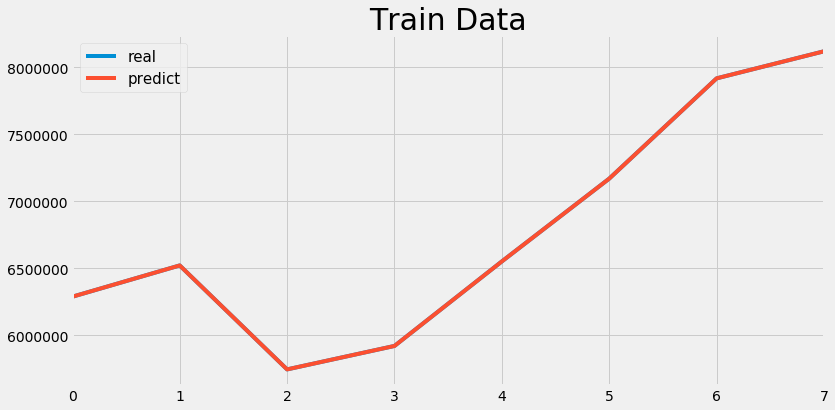

训练集上的MAE/MSE/MAPE/涨跌准确率
0.0002243518829345703
6.550544640049338e-08
3.3184723016764857e-09
1.0
最终预测为： [[-33812177.42844152]]


In [129]:
# 建立线性回归模型 预测
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model = lr.fit(x_train, y_train) 
print('coef:',model.coef_)
result1=output(model,x_train, y_train)
string='result1.xlsx'
string=area+string
pd.DataFrame(result1).to_excel(string)

E:\anoconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246256304939.0622, tolerance: 541760517.8786
  positive)


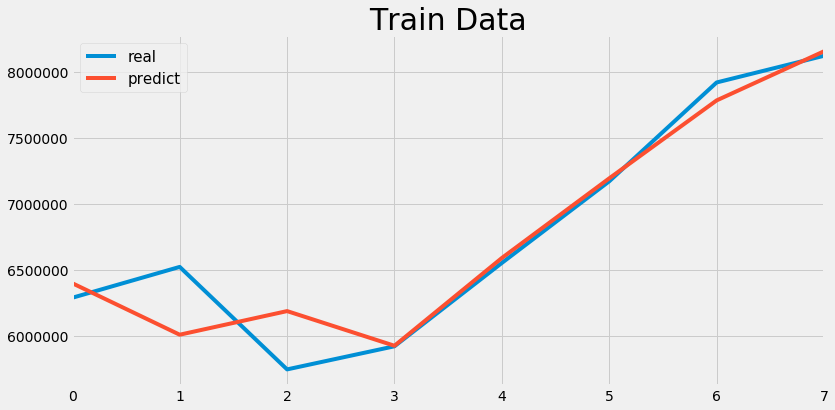

训练集上的MAE/MSE/MAPE/涨跌准确率
162389.1278965883
61563995620.05206
2.5649465286765287
0.5714285714285714
最终预测为： [[8868562.37852535]]


In [130]:
#弹性网回归及其结果
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet(alpha=.01, l1_ratio=1, random_state=3)
model = elasticnet.fit(x_train, y_train)
result2=output(model,x_train, y_train)
string='result2.xlsx'
string=area+string
pd.DataFrame(result2).to_excel(string)